In [2]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

#Array processing
import numpy as np
#Data analysis, wrangling and common exploratory operations
import pandas as pd
from pandas import Series, DataFrame
from itertools import chain

#For visualization. Matplotlib for basic viz and seaborn for more stylish figures
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_data = pd.read_csv('dataset_python.csv', encoding='latin1')


df_data.head()

,age,employment,fw,education,years-education,marital-status,job,bond,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income > 50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,Yes
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,No
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,Yes
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,No
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,No


In [4]:
#Task 1-a: Print the details of the df_data data frame (information such as number of rows,columns, name of columns, etc)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   employment       41459 non-null  object
 2   fw               43957 non-null  int64 
 3   education        43957 non-null  object
 4   years-education  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   job              41451 non-null  object
 7   bond             43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43957 non-null  object
 14  income > 50K     43957 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.0+ MB


In [5]:
#Task 1-b: Print name of all the countries used in the dataset. 
df_data['native-country']
set(df_data['native-country'])

{'Cambodia',
 'Canada',
 'China',
 'Columbia',
 'Cuba',
 'Dominican-Republic',
 'Ecuador',
 'El-Salvador',
 'England',
 'France',
 'Germany',
 'Greece',
 'Guatemala',
 'Haiti',
 'Holand-Netherlands',
 'Honduras',
 'Hong',
 'Hungary',
 'India',
 'Iran',
 'Ireland',
 'Italy',
 'Jamaica',
 'Japan',
 'Laos',
 'Mexico',
 'Nicaragua',
 'Outlying-US(Guam-USVI-etc)',
 'Peru',
 'Philippines',
 'Poland',
 'Portugal',
 'Puerto-Rico',
 'Scotland',
 'South',
 'Taiwan',
 'Thailand',
 'Trinadad&Tobago',
 'United-States',
 'Unknown',
 'Vietnam',
 'Yugoslavia'}

In [6]:
#Task 1-c: print descriptive deatils for "employment column of the df_data"
print(df_data[['employment']].to_string(index=False))

      employment
         Private
         Private
         Private
       State-gov
       State-gov
       State-gov
         Private
Self-emp-not-inc
         Private
         Private
         Private
Self-emp-not-inc
Self-emp-not-inc
         Private
         Private
         Private
         Private
     Federal-gov
       Local-gov
         Private
         Private
         Private
Self-emp-not-inc
         Private
Self-emp-not-inc
         Private
         Private
         Private
    Self-emp-inc
         Private
         Private
       Local-gov
         Private
             NaN
Self-emp-not-inc
Self-emp-not-inc
       Local-gov
         Private
         Private
         Private
         Private
       State-gov
         Private
         Private
         Private
         Private
         Private
Self-emp-not-inc
             NaN
         Private
         Private
         Private
         Private
         Private
         Private
Self-emp-not-inc
    Self-emp-inc
       Local-g

In [7]:
#Task 1-d: Some of the entries in the columns are undefined. Determine which columns contain these undefined entries and print the count of these undefined entries for each column respectively
print(df_data.isnull().sum())

age                   0
employment         2498
fw                    0
education             0
years-education       0
marital-status        0
job                2506
bond                  0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country        0
income > 50K          0
dtype: int64


In [8]:
# Task 2-a: Find out how many doctorates there are that are married.
er of marrieprint("total numbd doctorates:-",len(df_data[df_data['education'].str.contains('Doctorate')&df_data['marital-status'].str.contains('Married-civ-spouse')]))

total number of married doctorates:- 363


In [9]:
# Task 2-b: Retrieve and print the records of Americans over 40 years who have been putting in more than 40 hours a week of work.
df_data[(df_data['native-country'].str.contains('United-States'))& (df_data['age']>40) & (df_data['hours-per-week']>40 ) ]

,age,employment,fw,education,years-education,marital-status,job,bond,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income > 50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,Yes
19,44,Private,136986,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,Yes
26,49,Private,102583,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1848,44,United-States,Yes
32,71,Private,152307,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,2377,45,United-States,Yes
47,56,Self-emp-not-inc,176280,HS-grad,9,Divorced,Other-service,Not-in-family,White,Male,0,0,50,United-States,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43929,50,State-gov,297551,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,52,United-States,No
43930,41,Self-emp-inc,151089,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,2415,55,United-States,Yes
43938,50,Private,162632,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,No
43939,57,NaN,153788,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,99999,0,45,United-States,Yes


In [10]:
# Task 2-c: Discover the top 10 nations with the highest incomes and print a list of them.
df_data.sort_values(by=['capital-gain'],ascending=False).head(11)

,age,employment,fw,education,years-education,marital-status,job,bond,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income > 50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,Yes
35815,33,Private,134886,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,99999,0,30,United-States,Yes
14043,55,Private,197399,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,55,United-States,Yes
7843,30,State-gov,352045,Masters,14,Separated,Craft-repair,Not-in-family,White,Male,99999,0,40,United-States,Yes
15504,22,Self-emp-not-inc,214014,Some-college,10,Never-married,Sales,Own-child,Black,Male,99999,0,55,United-States,Yes
26886,40,Private,136986,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,52,United-States,Yes
917,47,Private,181307,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,99999,0,60,United-States,Yes
11045,34,Private,49469,Bachelors,13,Never-married,Sales,Not-in-family,White,Male,99999,0,50,United-States,Yes
35856,38,Federal-gov,37683,Prof-school,15,Never-married,Prof-specialty,Not-in-family,Asian-Pac-Islander,Female,99999,0,57,Canada,Yes
18665,61,NaN,139391,Some-college,10,Married-civ-spouse,NaN,Husband,White,Male,99999,0,30,United-States,Yes


In [11]:
# Task 2-d: Fetch and print the records of people having doctoral degrees and are divorced.  
df_data[df_data['education'].str.contains('Doctorate')& (df_data['marital-status'].str.contains('Divorced'))]

,age,employment,fw,education,years-education,marital-status,job,bond,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income > 50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,Yes
1533,39,State-gov,183092,Doctorate,16,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,Yes
2880,45,Private,252242,Doctorate,16,Divorced,Sales,Not-in-family,White,Male,99999,0,55,United-States,Yes
3047,49,State-gov,231961,Doctorate,16,Divorced,Prof-specialty,Unmarried,White,Male,0,0,50,United-States,Yes
7076,53,Self-emp-inc,42924,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,14084,0,50,United-States,Yes
9518,49,Private,132476,Doctorate,16,Divorced,Tech-support,Unmarried,White,Male,7430,0,40,United-States,Yes
9677,39,Private,203763,Doctorate,16,Divorced,Prof-specialty,Unmarried,White,Female,0,0,80,United-States,No
9863,63,Federal-gov,39181,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Female,0,2559,60,United-States,Yes
10089,37,Local-gov,184112,Doctorate,16,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,Yes
10773,56,Local-gov,52953,Doctorate,16,Divorced,Prof-specialty,Not-in-family,White,Female,0,1669,38,United-States,No


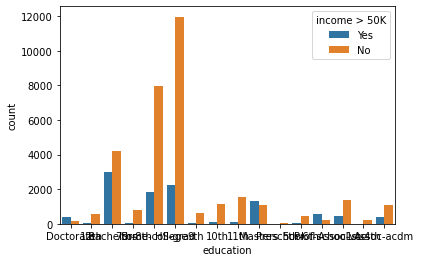

In [16]:
# Task 3-a: Display the countplot for education level of those with an income over 50K
sns.countplot(x='education',hue='income > 50K', data=df_data)
plt.show()

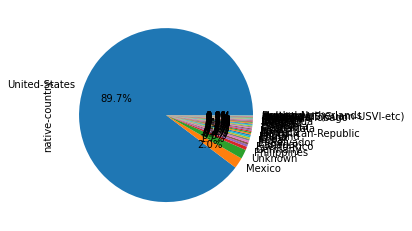

In [23]:
#Task 3-b: Display a pie chart that represents native country and display percentages in legend respectively
threeb=df_data['native-country'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()



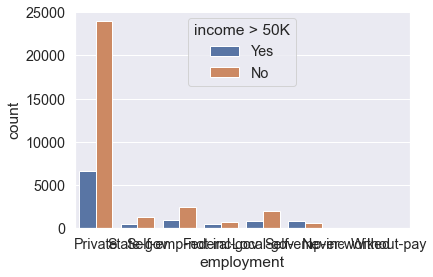

In [36]:
#4-a
sns.countplot(x='employment',hue='income > 50K', data=df_data)
plt.show()

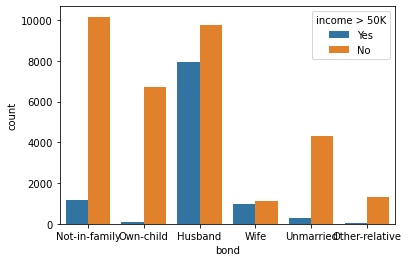

In [24]:
#4-b
sns.countplot(x='bond',hue='income > 50K', data=df_data)
plt.show()